In [102]:
import requests as rq
from bs4 import BeautifulSoup as bs
import json
import datetime as dt
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import sklearn

In [103]:
#link times series daily adjusted XOM
headers = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_0_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15"}

API_KEY = "LGCD1MSA9W87BCVR"
url_base = "https://www.alphavantage.co"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00

url_suite = "/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=XOM&outputsize=full&apikey=API_KEY"

full_url = url_base + url_suite
print(full_url)

https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=XOM&outputsize=full&apikey=API_KEY


In [104]:
#extract times series daily adjusted XOM
resp = rq.get(full_url, headers=headers).json()
data_json = resp['Time Series (Daily)']
dfXOM = pd.DataFrame.from_dict(data_json, orient='index')
dfXOM.index = pd.to_datetime(dfXOM.index)
dfXOM = dfXOM.apply(pd.to_numeric, errors='coerce')

dfXOM = dfXOM[['5. adjusted close']]
dfXOM.rename(columns = {'5. adjusted close':'adjcloseXOM'}, inplace = True)
  
dfXOM = dfXOM.iloc[:2540,]
dfXOM

,adjcloseXOM
2023-02-03,111.920000
2023-02-02,111.150000
2023-02-01,114.740000
2023-01-31,116.010000
2023-01-30,113.560000
...,...
2013-01-09,57.660170
2013-01-08,57.882594
2013-01-07,57.522791
2013-01-04,58.196605


In [105]:
#link times series daily adjusted MSFT
headers = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_0_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15"}

API_KEY = "LGCD1MSA9W87BCVR"
url_base = "https://www.alphavantage.co"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00

url_suite = "/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=MSFT&outputsize=full&apikey=API_KEY"

full_url = url_base + url_suite
print(full_url)

https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=MSFT&outputsize=full&apikey=API_KEY


In [106]:
#extract times series daily adjusted MSFT
resp = rq.get(full_url, headers=headers).json()
data_json = resp['Time Series (Daily)']

dfMSFT = pd.DataFrame.from_dict(data_json, orient='index')
dfMSFT.index = pd.to_datetime(dfMSFT.index)
dfMSFT = dfMSFT.apply(pd.to_numeric, errors='coerce')

dfMSFT = dfMSFT[['5. adjusted close']]
dfMSFT.rename(columns = {'5. adjusted close':'adjcloseMSFT'}, inplace = True)

dfMSFT = dfMSFT.iloc[:2540,]
dfMSFT

,adjcloseMSFT
2023-02-03,258.350000
2023-02-02,264.600000
2023-02-01,252.750000
2023-01-31,247.810000
2023-01-30,242.710000
...,...
2013-01-09,22.020456
2013-01-08,21.896745
2013-01-07,22.012208
2013-01-04,22.053445


In [107]:
#link times series daily adjusted JPM
headers = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_0_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15"}

API_KEY = "LGCD1MSA9W87BCVR"
url_base = "https://www.alphavantage.co"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00

url_suite = "/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=JPM&outputsize=full&apikey=API_KEY"

full_url = url_base + url_suite
print(full_url)

https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=JPM&outputsize=full&apikey=API_KEY


In [108]:
#extract times series daily adjusted JPM
resp = rq.get(full_url, headers=headers).json()
data_json = resp['Time Series (Daily)']

dfJPM = pd.DataFrame.from_dict(data_json, orient='index')
dfJPM.index = pd.to_datetime(dfJPM.index)
dfJPM = dfJPM.apply(pd.to_numeric, errors='coerce')

dfJPM = dfJPM[['5. adjusted close']]
dfJPM.rename(columns = {'5. adjusted close':'adjcloseJPM'}, inplace = True)

dfJPM = dfJPM.iloc[:2540,]
dfJPM

,adjcloseJPM
2023-02-03,141.090000
2023-02-02,138.940000
2023-02-01,139.590000
2023-01-31,139.960000
2023-01-30,139.130000
...,...
2013-01-09,34.430859
2013-01-08,34.453575
2013-01-07,34.385426
2013-01-04,34.347564


In [109]:
# Perform a concatenate to merge the 3 daily adjusted close
dfconcate = pd.concat([dfXOM, dfMSFT, dfJPM], axis=1)
dfconcate

# Setting the timestamp as the index
#dfXOM.set_index('Date', inplace=True)
#dfMSFT.set_index('Date', inplace=True)
#dfJPM.set_index('Date', inplace=True)

# Perform a join to merge the 3 daily adjusted close
#dfjoine = dfXOM.join(dfMSFT, how='outer').join(dfJPM, how='outer')
#dfjoine

,adjcloseXOM,adjcloseMSFT,adjcloseJPM
2023-02-03,111.920000,258.350000,141.090000
2023-02-02,111.150000,264.600000,138.940000
2023-02-01,114.740000,252.750000,139.590000
2023-01-31,116.010000,247.810000,139.960000
2023-01-30,113.560000,242.710000,139.130000
...,...,...,...
2013-01-09,57.660170,22.020456,34.430859
2013-01-08,57.882594,21.896745,34.453575
2013-01-07,57.522791,22.012208,34.385426
2013-01-04,58.196605,22.053445,34.347564


In [110]:
#link times series long term debt XOM
headers = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_0_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15"}

API_KEY = "LGCD1MSA9W87BCVR"
url_base = "https://www.alphavantage.co"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00

url_suite = "/query?function=BALANCE_SHEET&symbol=XOM&apikey=API_KEY"

full_url = url_base + url_suite
print(full_url)

https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol=XOM&apikey=API_KEY


In [111]:
#extract long term debt from balance sheet XOM
# quarterly data from 2017-12-31 to 2022-09-30

resp = rq.get(full_url, headers=headers).json()
test = resp['quarterlyReports']

dfLTdebtXOM = pd.DataFrame.from_dict(test)
dfLTdebtXOM.set_index('fiscalDateEnding', inplace=True)
dfLTdebtXOM.index = pd.to_datetime(dfLTdebtXOM.index)

dfLTdebtXOM = dfLTdebtXOM.apply(pd.to_numeric, errors='coerce')

dfLTdebtXOM = dfLTdebtXOM[['longTermDebt']]
dfLTdebtXOM.rename(columns = {'longTermDebt':'LTdebtXOM'}, inplace = True)
dfLTdebtXOM

,LTdebtXOM
fiscalDateEnding,
2022-09-30,39246000000
2022-06-30,39516000000
2022-03-31,42651000000
2021-12-31,16064000000
2021-09-30,43639000000
2021-06-30,45319000000
2021-03-31,45137000000
2020-12-31,15960000000
2020-09-30,46888000000


In [112]:
#link times series long term debt MSFT
headers = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_0_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15"}

API_KEY = "LGCD1MSA9W87BCVR"
url_base = "https://www.alphavantage.co"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00

url_suite = "/query?function=BALANCE_SHEET&symbol=MSFT&apikey=API_KEY"

full_url = url_base + url_suite
print(full_url)

https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol=MSFT&apikey=API_KEY


In [113]:
#extract long term debt from balance sheet MSFT
# quarterly data from 2017-12-31 to 2022-09-30

resp = rq.get(full_url, headers=headers).json()
test = resp['quarterlyReports']
dfLTdebtMSFT = pd.DataFrame.from_dict(test)
dfLTdebtMSFT.set_index('fiscalDateEnding', inplace=True)
dfLTdebtMSFT.index = pd.to_datetime(dfLTdebtMSFT.index)

dfLTdebtMSFT = dfLTdebtMSFT.apply(pd.to_numeric, errors='coerce')
dfLTdebtMSFT = dfLTdebtMSFT[['longTermDebt']]
dfLTdebtMSFT.rename(columns = {'longTermDebt':'LTdebtMSFT'}, inplace = True)
dfLTdebtMSFT

,LTdebtMSFT
fiscalDateEnding,
2022-12-31,48116000000
2022-09-30,48622000000
2022-06-30,49781000000
2022-03-31,49926000000
2021-12-31,53258000000
2021-09-30,53288000000
2021-06-30,58146000000
2021-03-31,58058000000
2020-12-31,60523000000


In [114]:
#link times series long term debt JPM
headers = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_0_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15"}

API_KEY = "LGCD1MSA9W87BCVR"
url_base = "https://www.alphavantage.co"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00

url_suite = "/query?function=BALANCE_SHEET&symbol=JPM&apikey=API_KEY"

full_url = url_base + url_suite
print(full_url)

https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol=JPM&apikey=API_KEY


In [115]:
#extract long term debt from balance sheet JPM
# quarterly data from 2017-12-31 to 2022-09-30

resp = rq.get(full_url, headers=headers).json()
test = resp['quarterlyReports']

dfLTdebtJPM = pd.DataFrame.from_dict(test)
dfLTdebtJPM.set_index('fiscalDateEnding', inplace=True)
dfLTdebtJPM.index = pd.to_datetime(dfLTdebtJPM.index)

dfLTdebtJPM = dfLTdebtJPM.apply(pd.to_numeric, errors='coerce')

dfLTdebtJPM = dfLTdebtJPM[['longTermDebt']]
dfLTdebtJPM.rename(columns = {'longTermDebt':'LTdebtJPM'}, inplace = True)
dfLTdebtJPM

KeyError: 'quarterlyReports'

In [ ]:
# Perform a concatenate to merge the 3 long term debt
dfLTDconcate = pd.concat([dfLTdebtXOM, dfLTdebtMSFT, dfLTdebtJPM], axis=1)
dfLTDconcate

In [116]:
#link to inflation

headers = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_0_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15"}

API_KEY = "LGCD1MSA9W87BCVR"
url_base = "https://www.alphavantage.co"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00

url_suite = "/query?function=CPI&interval=monthly&apikey=API_KEY" 

full_url = url_base + url_suite
print(full_url)

https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey=API_KEY


In [121]:
#extract inflation

respCPI = rq.get(full_url, headers=headers).json()
testCPI = respCPI['data']
dfCPI = pd.DataFrame.from_dict(testCPI)
dfCPI.set_index('date', inplace=True)
dfCPI.index = pd.to_datetime(dfCPI.index)
dfCPI = dfCPI.apply(pd.to_numeric, errors='coerce')
dfCPI.rename(columns = {'value':'CPImonthly'}, inplace = True)
dfCPI = dfCPI.iloc[:120,]
dfCPI

,CPImonthly
date,
2022-12-01,296.797
2022-11-01,297.711
2022-10-01,298.012
2022-09-01,296.808
2022-08-01,296.171
...,...
2013-05-01,232.945
2013-04-01,232.531
2013-03-01,232.773


In [122]:
dfcloseCPI=pd.concat([dfconcate,dfCPI], axis=1)
dfcloseCPI

# Join gives the same result
#dfcloseCPIbis=dfconcate.join(dfCPI, how='outer')
#dfcloseCPIbis

,adjcloseXOM,adjcloseMSFT,adjcloseJPM,CPImonthly
2013-01-01,NaN,NaN,NaN,230.28
2013-01-03,57.928388,22.474061,33.749360,NaN
2013-01-04,58.196605,22.053445,34.347564,NaN
2013-01-07,57.522791,22.012208,34.385426,NaN
2013-01-08,57.882594,21.896745,34.453575,NaN
...,...,...,...,...
2023-01-30,113.560000,242.710000,139.130000,NaN
2023-01-31,116.010000,247.810000,139.960000,NaN
2023-02-01,114.740000,252.750000,139.590000,NaN
2023-02-02,111.150000,264.600000,138.940000,NaN


In [123]:
dataset=pd.concat([dfcloseCPI, dfLTDconcate], axis=1)
#dataset
dataset.iloc[1400:1450]

,adjcloseXOM,adjcloseMSFT,adjcloseJPM,CPImonthly,LTdebtXOM,LTdebtMSFT,LTdebtJPM
2018-06-19,63.301295,95.811783,93.277288,NaN,NaN,NaN,NaN
2018-06-20,63.105195,96.771231,93.268616,NaN,NaN,NaN,NaN
2018-06-21,62.509049,96.077768,93.242597,NaN,NaN,NaN,NaN
2018-06-22,63.834689,95.384306,91.716162,NaN,NaN,NaN,NaN
2018-06-25,62.548269,93.465411,90.883562,NaN,NaN,NaN,NaN
2018-06-26,63.254231,94.120875,90.944272,NaN,NaN,NaN,NaN
2018-06-27,64.093542,92.657955,89.539259,NaN,NaN,NaN,NaN
2018-06-28,64.297487,93.693398,91.004983,NaN,NaN,NaN,NaN
2018-06-29,64.893633,93.674399,90.371859,NaN,NaN,NaN,NaN
2018-06-30,NaN,NaN,NaN,NaN,1.928200e+10,7.620000e+10,1.711610e+11


In [124]:
#Shape of the dataset 
dataset.shape

(2589, 7)

In [125]:
#Comments regarding missing values:
#dataset contains 2589 rows 
#adjusted close contains 2540 rows -> 2589-2540=49 rows added (NaN) for inflation and LTdebt on holidays
#CPI contains 120 rows -> 2589-120=2469 rows missing (Nan)
#longTermDebt contains 20 rows -> 2589-20=2569 rows missing (NaN)  
missing_values_count = dataset.isnull().sum()
missing_values_count

adjcloseXOM       49
adjcloseMSFT      49
adjcloseJPM       49
CPImonthly      2469
LTdebtXOM       2569
LTdebtMSFT      2569
LTdebtJPM       2569
dtype: int64

In [126]:
# Summary statistics
teststat = dataset.describe().round(2)
teststat

,adjcloseXOM,adjcloseMSFT,adjcloseJPM,CPImonthly,LTdebtXOM,LTdebtMSFT,LTdebtJPM
count,2540.00,2540.00,2540.00,120.00,2.000000e+01,2.000000e+01,2.000000e+01
mean,61.99,118.45,84.55,252.10,2.808065e+10,6.300440e+10,2.476209e+11
std,13.98,91.20,35.77,17.86,1.415468e+10,1.012696e+10,8.214416e+10
min,26.77,21.82,33.75,230.28,7.313000e+09,4.811600e+10,1.568580e+11
25%,57.68,41.51,49.53,237.89,1.731350e+10,5.328050e+10,1.795690e+11
50%,61.11,83.15,85.34,247.34,2.336550e+10,6.343950e+10,2.416265e+11
75%,64.81,199.95,108.98,258.78,4.289800e+10,7.240850e+10,2.919220e+11
max,117.76,339.89,165.25,298.01,4.688800e+10,7.690000e+10,4.277480e+11


<AxesSubplot:>

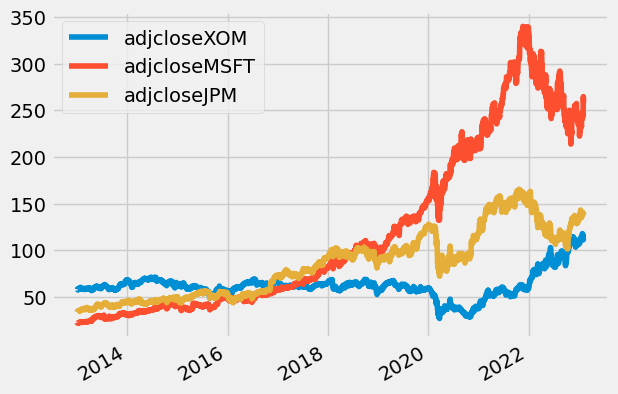

In [127]:
dataset[["adjcloseXOM","adjcloseMSFT", "adjcloseJPM"]].dropna().plot()

<AxesSubplot:>

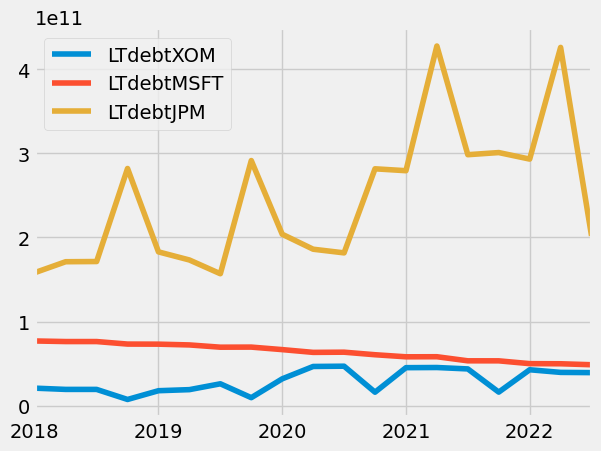

In [128]:
dataset[["LTdebtXOM","LTdebtMSFT", "LTdebtJPM"]].dropna().plot()

<AxesSubplot:>

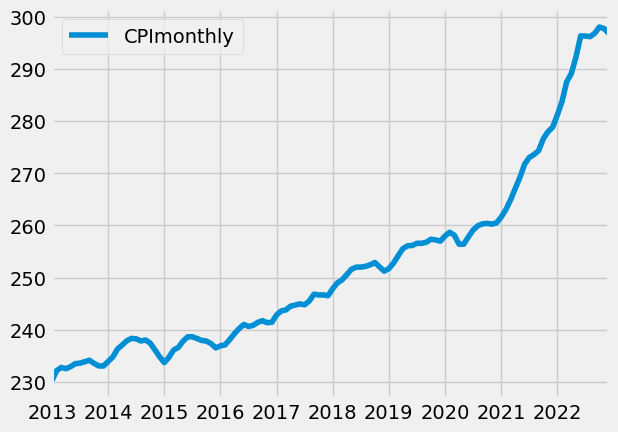

In [129]:
dataset[["CPImonthly"]].dropna().plot()

In [130]:
# Just by curiosity: Stationarity of the time series: Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller

stat, p, lags, obs, crit, t = adfuller(dataset.loc[:,"CPImonthly"].dropna())
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
 print('Probably not Stationary')
else:
 print('Probably Stationary')

stat=2.092, p=0.999
Probably not Stationary


In [131]:
# Read the csv file containing 3 keywords collected from Google Trends (company name plus 2 industry names) 

XOMsentiment = pd.read_csv('Exxon Mobil Energy industry Oil industry.csv')
MSFTsentiment = pd.read_csv('Microsoft Technology Manufacturing.csv') 
JPMsentiment = pd.read_csv('JPM Finance Banking.csv')

In [132]:
# Put the csv file into a panda dataframe, set Date as index and create the mean of the 3 trends in a new column
# MeanSentXOM evaluates the sentiment of XOM in its sector

dfXOMsentiment = pd.DataFrame(XOMsentiment)

dfXOMsentiment = dfXOMsentiment.iloc[108:,]

dfXOMsentiment.set_index('Mois', inplace=True)
dfXOMsentiment.index = pd.to_datetime(dfXOMsentiment.index)

dfXOMsentiment = dfXOMsentiment.apply(pd.to_numeric, errors='coerce')
dfXOMsentiment["MeanSentXOM"] = ((dfXOMsentiment["Exxon Mobil"] + dfXOMsentiment["Energy industry"] + dfXOMsentiment["Oil industry"])/3).round(2)
dfXOMsentiment

,Exxon Mobil,Energy industry,Oil industry,MeanSentXOM
Mois,,,,
2013-01-01,51,7,16,24.67
2013-02-01,53,7,15,25.00
2013-03-01,54,8,15,25.67
2013-04-01,65,8,17,30.00
2013-05-01,51,7,16,24.67
...,...,...,...,...
2022-09-01,23,8,15,15.33
2022-10-01,30,7,16,17.67
2022-11-01,26,7,15,16.00


<AxesSubplot:xlabel='Mois'>

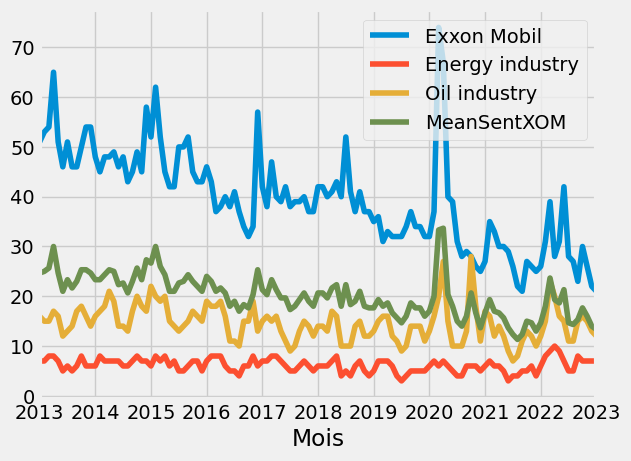

In [133]:
dfXOMsentiment[["Exxon Mobil", "Energy industry", "Oil industry", "MeanSentXOM"]].dropna().plot()

In [134]:
# Put the csv file into a panda dataframe, set Date as index and create the mean of the 3 trends in a new column
# MeanSentMSFT evaluates the sentiment of MSFT in its sector

dfMSFTsentiment = pd.DataFrame(MSFTsentiment)

dfMSFTsentiment = dfMSFTsentiment.iloc[108:,]

dfMSFTsentiment.set_index('Mois', inplace=True)
dfMSFTsentiment.index = pd.to_datetime(dfMSFTsentiment.index)

dfMSFTsentiment = dfMSFTsentiment.apply(pd.to_numeric, errors='coerce')
dfMSFTsentiment["MeanSentMSFT"] = ((dfMSFTsentiment["Microsoft"] + dfMSFTsentiment["Technology"] + dfMSFTsentiment["Manufacturing"])/3).round(2)
dfMSFTsentiment

,Microsoft,Technology,Manufacturing,MeanSentMSFT
Mois,,,,
2013-01-01,42,17,5,21.33
2013-02-01,40,17,5,20.67
2013-03-01,39,17,5,20.33
2013-04-01,37,17,5,19.67
2013-05-01,38,16,5,19.67
...,...,...,...,...
2022-09-01,31,13,5,16.33
2022-10-01,29,12,5,15.33
2022-11-01,29,11,5,15.00


<AxesSubplot:xlabel='Mois'>

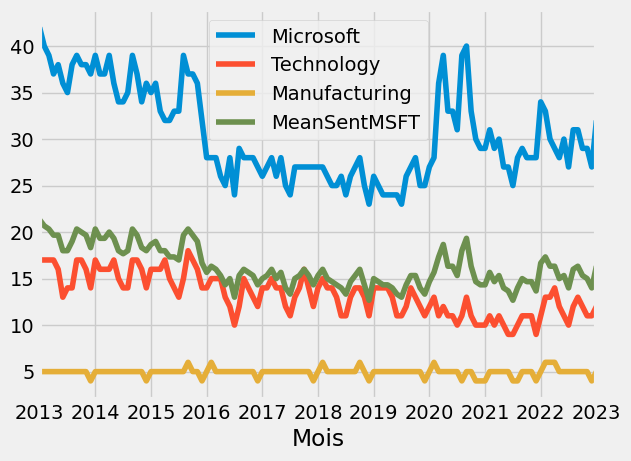

In [135]:
dfMSFTsentiment[["Microsoft","Technology", "Manufacturing", "MeanSentMSFT"]].dropna().plot()

In [136]:
# Put the csv file into a panda dataframe, set Date as index and create the mean of the 3 trends in a new column
# MeanSentJPM evaluates the sentiment of JPM in its sector

dfJPMsentiment = pd.DataFrame(JPMsentiment)

dfJPMsentiment = dfJPMsentiment.iloc[108:,]

dfJPMsentiment.set_index('Mois', inplace=True)
dfJPMsentiment.index = pd.to_datetime(dfJPMsentiment.index)

dfJPMsentiment = dfJPMsentiment.apply(pd.to_numeric, errors='coerce')
dfJPMsentiment["MeanSentJPM"] = ((dfJPMsentiment["JPMorgan Chase"] + dfJPMsentiment["Finance"] + dfJPMsentiment["Banking"])/3).round(2)
dfJPMsentiment

,JPMorgan Chase,Finance,Banking,MeanSentJPM
Mois,,,,
2013-01-01,24,53,40,39.00
2013-02-01,24,52,42,39.33
2013-03-01,25,53,42,40.00
2013-04-01,23,53,42,39.33
2013-05-01,23,52,42,39.00
...,...,...,...,...
2022-09-01,28,63,24,38.33
2022-10-01,29,59,24,37.33
2022-11-01,26,58,23,35.67


<AxesSubplot:xlabel='Mois'>

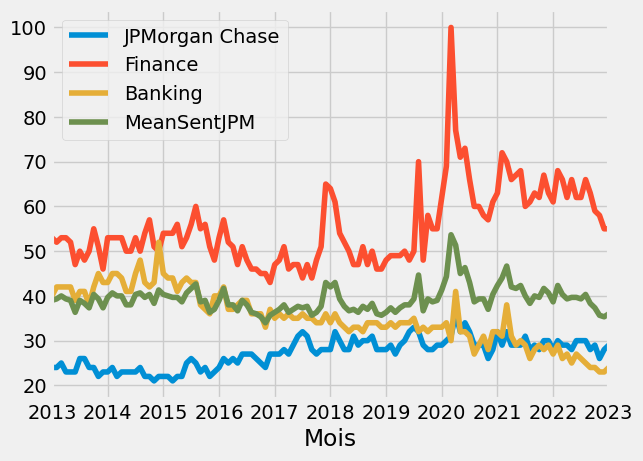

In [137]:
dfJPMsentiment[["JPMorgan Chase","Finance", "Banking", "MeanSentJPM"]].dropna().plot()

In [138]:
# Perform a concatenate to merge the 3 mean sentiments

dfsentimentconcate = pd.concat([dfXOMsentiment["MeanSentXOM"], dfMSFTsentiment["MeanSentMSFT"], dfJPMsentiment["MeanSentJPM"]], axis=1)
dfsentimentconcate

,MeanSentXOM,MeanSentMSFT,MeanSentJPM
Mois,,,
2013-01-01,24.67,21.33,39.00
2013-02-01,25.00,20.67,39.33
2013-03-01,25.67,20.33,40.00
2013-04-01,30.00,19.67,39.33
2013-05-01,24.67,19.67,39.00
...,...,...,...
2022-09-01,15.33,16.33,38.33
2022-10-01,17.67,15.33,37.33
2022-11-01,16.00,15.00,35.67


In [139]:
# Perform a concatenate to merge the dataset with the 3 mean sentiments; lines 1400-1450 show the different frequencies

dataset = pd.concat([dataset, dfsentimentconcate], axis=1)
dataset.iloc[1400:1450]

,adjcloseXOM,adjcloseMSFT,adjcloseJPM,CPImonthly,LTdebtXOM,LTdebtMSFT,LTdebtJPM,MeanSentXOM,MeanSentMSFT,MeanSentJPM
2018-06-19,63.301295,95.811783,93.277288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-20,63.105195,96.771231,93.268616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-21,62.509049,96.077768,93.242597,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-22,63.834689,95.384306,91.716162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-25,62.548269,93.465411,90.883562,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-26,63.254231,94.120875,90.944272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-27,64.093542,92.657955,89.539259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-28,64.297487,93.693398,91.004983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-29,64.893633,93.674399,90.371859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-30,NaN,NaN,NaN,NaN,1.928200e+10,7.620000e+10,1.711610e+11,NaN,NaN,NaN


In [140]:
# Final version of the dataset is ready with:
# Company metrics for XOM, MSFT and JPM: adjclose (daily), long term debt (quarterly) from 31/12/2017-31/12/2021, mean sentiment (monthly)
# Macroeconomic metric: inflation (monthly)

dataset

,adjcloseXOM,adjcloseMSFT,adjcloseJPM,CPImonthly,LTdebtXOM,LTdebtMSFT,LTdebtJPM,MeanSentXOM,MeanSentMSFT,MeanSentJPM
2013-01-01,NaN,NaN,NaN,230.28,NaN,NaN,NaN,24.67,21.33,39.0
2013-01-03,57.928388,22.474061,33.749360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,58.196605,22.053445,34.347564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,57.522791,22.012208,34.385426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,57.882594,21.896745,34.453575,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-01-30,113.560000,242.710000,139.130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-31,116.010000,247.810000,139.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-01,114.740000,252.750000,139.590000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-02,111.150000,264.600000,138.940000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
# Summary statistics with sentiments included
teststatfull = dataset.describe().round(2)
teststatfull

,adjcloseXOM,adjcloseMSFT,adjcloseJPM,CPImonthly,LTdebtXOM,LTdebtMSFT,LTdebtJPM,MeanSentXOM,MeanSentMSFT,MeanSentJPM
count,2540.00,2540.00,2540.00,120.00,2.000000e+01,2.000000e+01,2.000000e+01,121.00,121.00,121.00
mean,61.99,118.45,84.55,252.10,2.808065e+10,6.300440e+10,2.476209e+11,20.10,16.25,39.28
std,13.98,91.20,35.77,17.86,1.415468e+10,1.012696e+10,8.214416e+10,4.23,2.16,2.95
min,26.77,21.82,33.75,230.28,7.313000e+09,4.811600e+10,1.568580e+11,11.33,12.67,34.00
25%,57.68,41.51,49.53,237.89,1.731350e+10,5.328050e+10,1.795690e+11,17.33,14.67,37.33
50%,61.11,83.15,85.34,247.34,2.336550e+10,6.343950e+10,2.416265e+11,20.00,15.67,39.00
75%,64.81,199.95,108.98,258.78,4.289800e+10,7.240850e+10,2.919220e+11,23.00,18.00,40.33
max,117.76,339.89,165.25,298.01,4.688800e+10,7.690000e+10,4.277480e+11,33.67,21.33,53.67


In [142]:
# Dataset cleaned: NaN replaced by their previous value and then 0 for the remaining
datasetclean = dataset.fillna(method='ffill', axis=0).fillna(0)
datasetclean

,adjcloseXOM,adjcloseMSFT,adjcloseJPM,CPImonthly,LTdebtXOM,LTdebtMSFT,LTdebtJPM,MeanSentXOM,MeanSentMSFT,MeanSentJPM
2013-01-01,0.000000,0.000000,0.000000,230.280,0.000000e+00,0.000000e+00,0.000000e+00,24.67,21.33,39.0
2013-01-03,57.928388,22.474061,33.749360,230.280,0.000000e+00,0.000000e+00,0.000000e+00,24.67,21.33,39.0
2013-01-04,58.196605,22.053445,34.347564,230.280,0.000000e+00,0.000000e+00,0.000000e+00,24.67,21.33,39.0
2013-01-07,57.522791,22.012208,34.385426,230.280,0.000000e+00,0.000000e+00,0.000000e+00,24.67,21.33,39.0
2013-01-08,57.882594,21.896745,34.453575,230.280,0.000000e+00,0.000000e+00,0.000000e+00,24.67,21.33,39.0
...,...,...,...,...,...,...,...,...,...,...
2023-01-30,113.560000,242.710000,139.130000,296.797,3.924600e+10,4.811600e+10,2.019570e+11,13.33,16.33,36.0
2023-01-31,116.010000,247.810000,139.960000,296.797,3.924600e+10,4.811600e+10,2.019570e+11,13.33,16.33,36.0
2023-02-01,114.740000,252.750000,139.590000,296.797,3.924600e+10,4.811600e+10,2.019570e+11,13.33,16.33,36.0
2023-02-02,111.150000,264.600000,138.940000,296.797,3.924600e+10,4.811600e+10,2.019570e+11,13.33,16.33,36.0


In [143]:
datasetclean.iloc[1400:1450]

,adjcloseXOM,adjcloseMSFT,adjcloseJPM,CPImonthly,LTdebtXOM,LTdebtMSFT,LTdebtJPM,MeanSentXOM,MeanSentMSFT,MeanSentJPM
2018-06-19,63.301295,95.811783,93.277288,251.989,2.078100e+10,7.690000e+10,1.581210e+11,18.00,14.00,37.00
2018-06-20,63.105195,96.771231,93.268616,251.989,2.078100e+10,7.690000e+10,1.581210e+11,18.00,14.00,37.00
2018-06-21,62.509049,96.077768,93.242597,251.989,2.078100e+10,7.690000e+10,1.581210e+11,18.00,14.00,37.00
2018-06-22,63.834689,95.384306,91.716162,251.989,2.078100e+10,7.690000e+10,1.581210e+11,18.00,14.00,37.00
2018-06-25,62.548269,93.465411,90.883562,251.989,2.078100e+10,7.690000e+10,1.581210e+11,18.00,14.00,37.00
2018-06-26,63.254231,94.120875,90.944272,251.989,2.078100e+10,7.690000e+10,1.581210e+11,18.00,14.00,37.00
2018-06-27,64.093542,92.657955,89.539259,251.989,2.078100e+10,7.690000e+10,1.581210e+11,18.00,14.00,37.00
2018-06-28,64.297487,93.693398,91.004983,251.989,2.078100e+10,7.690000e+10,1.581210e+11,18.00,14.00,37.00
2018-06-29,64.893633,93.674399,90.371859,251.989,2.078100e+10,7.690000e+10,1.581210e+11,18.00,14.00,37.00
2018-06-30,64.893633,93.674399,90.371859,251.989,1.928200e+10,7.620000e+10,1.711610e+11,18.00,14.00,37.00


In [193]:
# Summary statistics
datasetclean = dataset.describe().round(2)
datasetclean

,adjcloseXOM,adjcloseMSFT,adjcloseJPM,CPImonthly,LTdebtXOM,LTdebtMSFT,LTdebtJPM,MeanSentXOM,MeanSentMSFT,MeanSentJPM
count,2540.00,2540.00,2540.00,120.00,2.000000e+01,2.000000e+01,2.000000e+01,121.00,121.00,121.00
mean,61.99,118.45,84.55,252.10,2.808065e+10,6.300440e+10,2.476209e+11,20.10,16.25,39.28
std,13.98,91.20,35.77,17.86,1.415468e+10,1.012696e+10,8.214416e+10,4.23,2.16,2.95
min,26.77,21.82,33.75,230.28,7.313000e+09,4.811600e+10,1.568580e+11,11.33,12.67,34.00
25%,57.68,41.51,49.53,237.89,1.731350e+10,5.328050e+10,1.795690e+11,17.33,14.67,37.33
50%,61.11,83.15,85.34,247.34,2.336550e+10,6.343950e+10,2.416265e+11,20.00,15.67,39.00
75%,64.81,199.95,108.98,258.78,4.289800e+10,7.240850e+10,2.919220e+11,23.00,18.00,40.33
max,117.76,339.89,165.25,298.01,4.688800e+10,7.690000e+10,4.277480e+11,33.67,21.33,53.67


<AxesSubplot:>

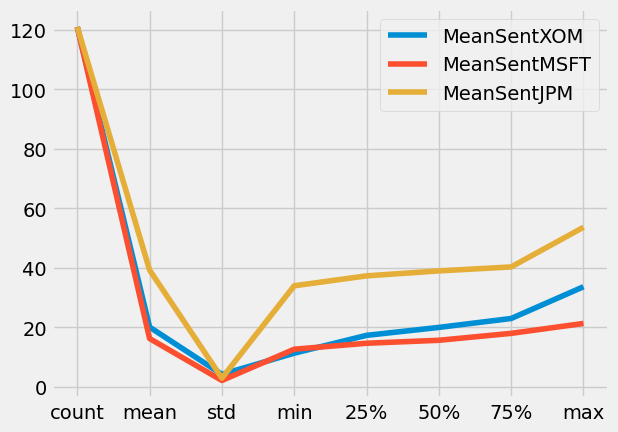

In [194]:
datasetclean[["MeanSentXOM","MeanSentMSFT", "MeanSentJPM"]].dropna().plot()

In [196]:
datasetclean.adjcloseXOM.quantile([.01, .1, .9, .99])

0.01      23.1983
0.10      35.6030
0.90     999.9230
0.99    2385.9923
Name: adjcloseMSFT, dtype: float64

In [198]:
datasetclean.adjcloseMSFT.quantile([.01, .1, .9, .99])

0.01      23.1983
0.10      35.6030
0.90     999.9230
0.99    2385.9923
Name: adjcloseMSFT, dtype: float64

In [197]:
datasetclean.adjcloseJPM.quantile([.01, .1, .9, .99])

0.01      33.8914
0.10      35.1640
0.90     877.6750
0.99    2373.7675
Name: adjcloseJPM, dtype: float64

In [144]:
#Random Forest XOM

In [145]:
# Convert datasetclean in array
datasetclean_rf = datasetclean[['adjcloseXOM', 'CPImonthly', 'LTdebtXOM', 'MeanSentXOM']]

In [146]:
# Constitute dataset X and y
X_df = datasetclean_rf[['CPImonthly', 'LTdebtXOM', 'MeanSentXOM']]
y_df = datasetclean_rf['adjcloseXOM']

X = np.array(X_df)
y = np.array(y_df)

In [147]:
# Split the sample into test and train then run the random forest regressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% train and 30% test

# After splitting, train the model on the training set and perform predictions on the test set
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=80)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=80)

In [148]:
# Predictions for adjcloseXOM

y_pred = rf_model.predict(X_test)
y_pred

array([ 54.3113007 ,  63.97845098,  67.91918866, 107.19183528,
        58.94431656, 112.89077849,  66.52144061,  69.11789359,
        58.22025744,  62.84541662,  91.52787372,  66.69571365,
        53.50330188,  64.18616868,  57.27406766,  60.89101344,
        55.79629084,  58.22025744,  49.96724979,  60.75552412,
        63.37736317,  58.23607376,  61.47349068,  49.96724979,
        62.34074029,  76.44870323,  66.07637042,  70.05091618,
        62.00947228,  58.94431656,  60.80673627,  61.47349068,
        58.36232056,  61.85320427,  41.64332832,  88.77885785,
        51.74046332,  60.80673627,  61.19279786,  64.81065603,
        65.83858638,  59.57379958,  64.08123965,  54.0319891 ,
        65.81081625,  58.23874588,  36.0985152 ,  61.04025533,
        59.6765693 ,  63.97845098,  51.74046332,  59.0598833 ,
        60.0428985 ,  55.67394111,  69.23126889,  54.17998282,
        59.38206291,  62.00947228,  62.84541662,  63.89851327,
        36.0985152 ,  68.28899817,  91.56825297,  60.04

In [149]:
# Test size is 30% of datasetclean so 2590*0.3 = 777 predictions for adjcloseXOM
y_pred.shape, y_test.shape

((777,), (777,))

In [150]:
# Model Accuracy, how often is the random forest regressor correct?

print(f" Final training accuracy: {round(rf_model.score(X_train, y_train)*100, 2)}%.")
print(f" Model accuracy: {round(rf_model.score(X_test, y_test)*100,2)}%.")

 Final training accuracy: 97.42%.
 Model accuracy: 98.04%.


In [154]:
# Mean absolute error and mean absolute percentage error
 
errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = (errors / y_test)
print('Mean Absolute Percentage Error:', round(np.mean(mape)*100, 2), '%.')

Mean Absolute Error: 1.27
Mean Absolute Percentage Error: 2.15 %.


In [155]:
# How important each feature among CPI, LTdebt and MeanSent is in predicting adjclose XOM

rf_model.feature_importances_

array([0.76575406, 0.15282945, 0.08141648])

In [156]:
# With sentences

importances = rf_model.feature_importances_
columns = X_df.columns
i = 0
while i<len(columns):
    print(f" The importance of feature '{columns[i]}' in predicting 'adjcloseXOM' is {round(importances[i] * 100, 2)}%.")
    i += 1

 The importance of feature 'CPImonthly' in predicting 'adjcloseXOM' is 76.58%.
 The importance of feature 'LTdebtXOM' in predicting 'adjcloseXOM' is 15.28%.
 The importance of feature 'MeanSentXOM' in predicting 'adjcloseXOM' is 8.14%.


Text(0.5, 0, 'Relative Importance')

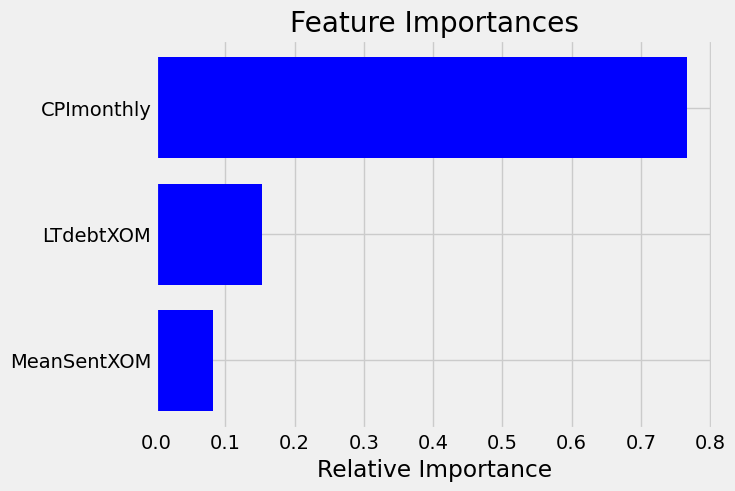

In [157]:
liste_variables = list(X_df.columns)

importances = rf_model.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')

In [158]:
# Try to make a new prediction for the next day

input_nextday = [[296.797, 3.924600e+10, 13.33]]
adjcloseXOM_nextday = rf_model.predict(input_nextday)
print(f" The value of 'adjcloseXOM' the next day is {round(adjcloseXOM_nextday[0],2)}.")

 The value of 'adjcloseXOM' the next day is 112.89.


In [159]:
# Try to make a new prediction for the next month assuming the same LTdebt, a light drop in CPI and MeanSent: the predicted stock price is down.

input_nextmonth = [[296.34, 3.924600e+10, 11.21]]
adjcloseXOM_nextmonth = rf_model.predict(input_nextmonth)
print(f" The value of 'adjcloseXOM' the next month is {round(adjcloseXOM_nextmonth[0],2)}.")

 The value of 'adjcloseXOM' the next month is 93.82.


In [160]:
#Random Forest MSFT

In [161]:
# Convert datasetclean in array
datasetclean_rf = datasetclean[['adjcloseMSFT', 'CPImonthly', 'LTdebtMSFT', 'MeanSentMSFT']]

In [162]:
# Constitute dataset X and y
X_df = datasetclean_rf[['CPImonthly', 'LTdebtMSFT', 'MeanSentMSFT']]
y_df = datasetclean_rf['adjcloseMSFT']

X = np.array(X_df)
y = np.array(y_df)

In [163]:
# Split the sample into test and train then run the random forest regressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% train and 30% test

# After splitting, train the model on the training set and perform predictions on the test set
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=80)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=80)

In [164]:
# Predictions for adjcloseMSFT

y_pred = rf_model.predict(X_test)
y_pred

array([206.61020374, 329.07379251, 118.72784322,  41.85445747,
        40.51101439,  38.82542864,  52.47880376,  53.05676679,
       260.60645708, 106.95284788, 218.46333014,  49.66837942,
       277.67163577,  40.67664416, 206.61020374, 113.31071346,
        40.67664416, 103.50859837,  57.30366804,  99.07678671,
       239.76559552,  40.51101439,  61.06586938,  47.31285326,
        49.76562779,  41.65575367, 332.32303214,  40.51101439,
        22.89718549,  68.12451556,  57.30366804,  29.03247964,
       100.10271186,  33.39715395,  99.05027057, 201.94638347,
       186.90051316,  66.74090569, 237.43771142,  78.65838347,
        31.90879639, 204.7375792 ,  43.52640811,  79.73687525,
        27.52404991, 134.11587598, 103.51969623,  59.96876237,
        38.5090772 , 135.64714826,  65.78586728,  30.82909002,
       277.67163577,  35.68221008,  38.82542864, 149.30666265,
        59.96876237,  66.74090569,  23.39235351,  37.44125458,
       293.95135771, 250.62099543,  34.3148182 , 279.95

In [165]:
# Test size is 30% of datasetclean so 2590*0.3 = 777 predictions for adjcloseMSFT
y_pred.shape, y_test.shape

((777,), (777,))

In [166]:
# Model Accuracy, how often is the random forest regressor correct?

print(f" Final training accuracy: {round(rf_model.score(X_train, y_train)*100, 2)}%.")
print(f" Model accuracy: {round(rf_model.score(X_test, y_test)*100,2)}%.")

 Final training accuracy: 99.76%.
 Model accuracy: 99.72%.


In [167]:
# Mean absolute error and mean absolute percentage error
 
errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = (errors / y_test)
print('Mean Absolute Percentage Error:', round(np.mean(mape)*100, 2), '%.')

Mean Absolute Error: 2.85
Mean Absolute Percentage Error: 2.15 %.


In [168]:
# How important each feature among CPI, LTdebt and MeanSent is in predicting adjclose MSFT

rf_model.feature_importances_

array([0.98590684, 0.00983135, 0.00426181])

In [169]:
# With sentences

importances = rf_model.feature_importances_
columns = X_df.columns
i = 0
while i<len(columns):
    print(f" The importance of feature '{columns[i]}' in predicting 'adjcloseMSFT' is {round(importances[i] * 100, 2)}%.")
    i += 1

 The importance of feature 'CPImonthly' in predicting 'adjcloseMSFT' is 98.59%.
 The importance of feature 'LTdebtMSFT' in predicting 'adjcloseMSFT' is 0.98%.
 The importance of feature 'MeanSentMSFT' in predicting 'adjcloseMSFT' is 0.43%.


Text(0.5, 0, 'Relative Importance')

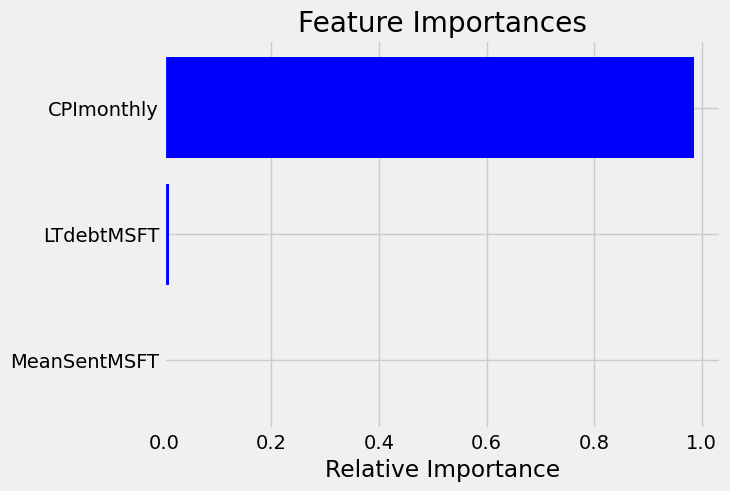

In [170]:
liste_variables = list(X_df.columns)

importances = rf_model.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')

In [171]:
# Try to make a new prediction for the next day

input_nextday = [[296.797, 4.811600e+10, 16.33]]
adjcloseMSFT_nextday = rf_model.predict(input_nextday)
print(f" The value of 'adjcloseMSFT' the next day is {round(adjcloseMSFT_nextday[0],2)}.")

 The value of 'adjcloseMSFT' the next day is 239.77.


In [172]:
# Try to make a new prediction for the next month assuming the same LTdebt, a light drop in CPI and MeanSent: the predicted stock price is down.

input_nextmonth = [[296.34, 4.811600e+10, 15.21]]
adjcloseMSFT_nextmonth = rf_model.predict(input_nextmonth)
print(f" The value of 'adjcloseMSFT' the next month is {round(adjcloseMSFT_nextmonth[0],2)}.")

 The value of 'adjcloseMSFT' the next month is 255.77.


In [173]:
#Random Forest JPM

In [174]:
# Convert datasetclean in array
datasetclean_rf = datasetclean[['adjcloseJPM', 'CPImonthly', 'LTdebtJPM', 'MeanSentJPM']]

In [175]:
# Constitute dataset X and y
X_df = datasetclean_rf[['CPImonthly', 'LTdebtJPM', 'MeanSentJPM']]
y_df = datasetclean_rf['adjcloseJPM']

X = np.array(X_df)
y = np.array(y_df)

In [176]:
# Split the sample into test and train then run the random forest regressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% train and 30% test

# After splitting, train the model on the training set and perform predictions on the test set
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=80)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=80)

In [177]:
# Predictions for adjcloseJPM

y_pred = rf_model.predict(X_test)
y_pred

array([ 38.73943615,  32.77973495, 117.66114527,  85.26577869,
       139.1735243 , 124.24729812,  72.89815834,  79.0359647 ,
       118.02443396,  44.58970097,  93.19160794,  52.44716178,
        74.6303534 ,  48.3398165 ,  52.06819553,  38.73943615,
        36.78580782,  93.6379159 ,  85.3665836 ,  54.52777985,
       146.60781709,  47.02855674,  47.02855674, 152.39336735,
       108.42683217,  44.1487951 , 124.24729812,  95.2196985 ,
        39.99105075,  40.42259498, 121.44857026,  91.47410475,
        44.58970097,  44.58970097,  93.6379159 ,  44.82431872,
        83.96376047, 118.02443396,  39.99105075,  46.86917631,
        83.43101931,  96.30554336,  89.87719558,  44.78450291,
       100.11612134,  95.2196985 , 110.17109029,  78.79082222,
       118.02443396,  93.6379159 ,  51.15953534, 139.1735243 ,
       126.665794  ,  47.34455299,  48.84137297,  83.96376047,
        50.11926837,  83.96376047,  42.37104444,  55.35334112,
        49.96272318,  42.37104444,  42.63876789, 121.44

In [178]:
# Test size is 30% of datasetclean so 2590*0.3 = 777 predictions for adjcloseJPM
y_pred.shape, y_test.shape

((777,), (777,))

In [179]:
# Model Accuracy, how often is the random forest regressor correct?
print(f" Final training accuracy: {round(rf_model.score(X_train, y_train)*100, 2)}%.")
print(f" Model accuracy: {round(rf_model.score(X_test, y_test)*100,2)}%.")

 Final training accuracy: 99.36%.
 Model accuracy: 99.08%.


In [181]:
# Mean absolute error and mean absolute percentage error
 
errors = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = (errors / y_test)
print('Mean Absolute Percentage Error:', round(np.mean(mape)*100, 2), '%.')

Mean Absolute Error: 2.2
Mean Absolute Percentage Error: 2.51 %.


In [182]:
# How important each feature among CPI, LTdebt and MeanSent is in predicting adjclose JPM

rf_model.feature_importances_

array([0.97801803, 0.00590561, 0.01607636])

In [183]:
# With sentences

importances = rf_model.feature_importances_
columns = X_df.columns
i = 0
while i<len(columns):
    print(f" The importance of feature '{columns[i]}' in predicting 'adjcloseJPM' is {round(importances[i] * 100, 2)}%.")
    i += 1

 The importance of feature 'CPImonthly' in predicting 'adjcloseJPM' is 97.8%.
 The importance of feature 'LTdebtJPM' in predicting 'adjcloseJPM' is 0.59%.
 The importance of feature 'MeanSentJPM' in predicting 'adjcloseJPM' is 1.61%.


Text(0.5, 0, 'Relative Importance')

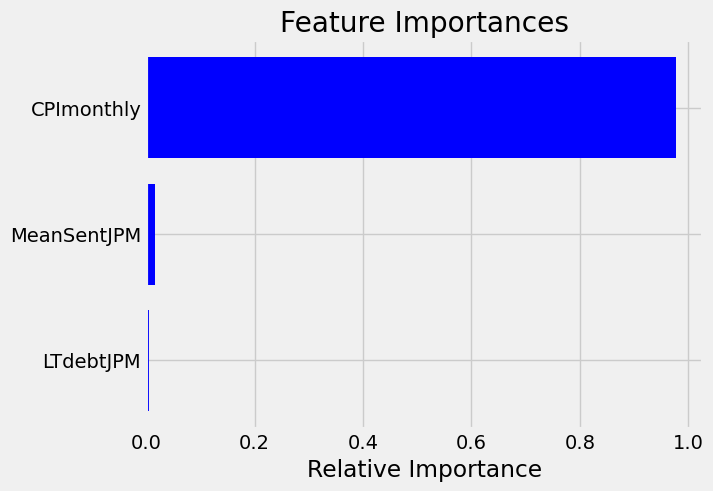

In [184]:
liste_variables = list(X_df.columns)

importances = rf_model.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')

In [188]:
# Try to make a new prediction for the next day

input_nextday = [[296.797, 2.019570e+11, 36.00]]
adjcloseJPM_nextday = rf_model.predict(input_nextday)
print(f" The value of 'adjcloseJPM' the next day is {round(adjcloseJPM_nextday[0],2)}.")

 The value of 'adjcloseJPM' the next day is 139.17.


In [189]:
# Try to make a new prediction for the next month assuming the same LTdebt, a light drop in CPI and MeanSent: the predicted stock price is down.

input_nextmonth = [[296.34, 2.019570e+11, 35.00]]
adjcloseJPM_nextmonth = rf_model.predict(input_nextmonth)
print(f" The value of 'adjcloseJPM' the next month is {round(adjcloseJPM_nextmonth[0],2)}.")

 The value of 'adjcloseJPM' the next month is 131.58.


/Users/laurene/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/laurene/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/laurene/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:2829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarra

Text(0.5, 1.0, 'stock price predictions')

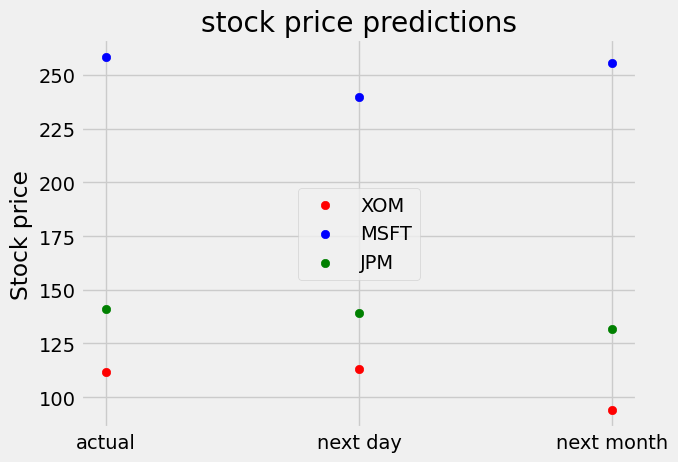

In [190]:
names = ["actual", "next day", "next month"]
valuesXOM = [datasetclean.iloc[-1,0], adjcloseXOM_nextday, adjcloseXOM_nextmonth]
valuesMSFT = [datasetclean.iloc[-1,1], adjcloseMSFT_nextday, adjcloseMSFT_nextmonth]
valuesJPM = [datasetclean.iloc[-1,2], adjcloseJPM_nextday, adjcloseJPM_nextmonth]
plt.scatter(names, valuesXOM, color='r')
plt.scatter(names, valuesMSFT, color='b')
plt.scatter(names, valuesJPM, color='g')
plt.legend(labels = ('XOM', 'MSFT', 'JPM'), loc = 'center')
plt.ylabel('Stock price')
plt.title("stock price predictions")